<a href="https://colab.research.google.com/github/atg2431-alpha/deep_learning/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [5]:
model = Sequential()

model.add(SimpleRNN(3, input_shape=(4, 5)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

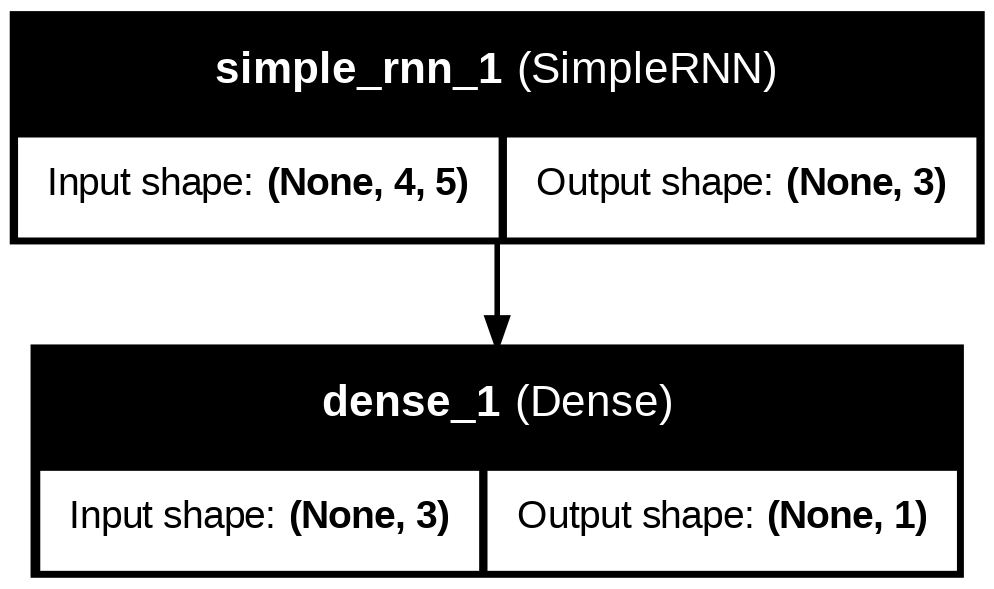

In [6]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [12]:
model.get_weights()

[array([[-0.47438893,  0.5101269 ,  0.6300215 ],
        [ 0.17830426,  0.5558402 ,  0.49256176],
        [ 0.5812455 , -0.30741692,  0.06510043],
        [-0.8401037 , -0.03240627, -0.6575943 ],
        [ 0.48335975, -0.28804243,  0.2600165 ]], dtype=float32),
 array([[-0.27031147,  0.8087059 , -0.5224237 ],
        [ 0.17857514,  0.5753226 ,  0.79819477],
        [ 0.9460669 ,  0.12246931, -0.29993105]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.9983593 ],
        [-0.00370812],
        [ 1.0721928 ]], dtype=float32),
 array([0.], dtype=float32)]